In [1]:
import pandas as pd
import numpy as np

In [2]:
import requests
from bs4 import BeautifulSoup, Comment
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.support.select import Select

In [3]:
from time import sleep

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt

In [6]:
option = Options()
option.headless = True
driver = webdriver.Firefox(options=option)

driver.get('https://www.nba.com/stats/players/traditional/')

driver.implicitly_wait(10)

driver.find_element_by_id('onetrust-accept-btn-handler').click()

sleep(5)

driver.find_element_by_xpath(
        f"//div[@class='nba-stat-table']//table//thead//tr//th[@data-field='AGE']").click()



select_fr = Select(driver.find_element_by_xpath(f"//div[@class='stats-table-pagination__info']//select"))
select_fr.select_by_index(0)

driver.implicitly_wait(5)
element = driver.find_element_by_xpath(
        "//div[@class='nba-stat-table']//table")

html_content = element.get_attribute('outerHTML')

soup = BeautifulSoup(html_content, 'html.parser')
table = soup.find(name='table')

df_full = pd.read_html(str(table))[0]

driver.quit()

In [7]:
df_full

,Unnamed: 0,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,...,REB RANK,AST RANK,TOV RANK,STL RANK,BLK RANK,PF RANK,FP RANK,DD2 RANK,TD3 RANK,+/- RANK
0,NaN,Andre Iguodala,MIA,37,50,27,23,21.2,4.4,1.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Carmelo Anthony,POR,36,54,31,23,25.1,13.3,4.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,JJ Redick,DAL,36,34,15,19,18.3,8.6,2.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,LeBron James,LAL,36,41,28,13,33.9,25.4,9.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Marc Gasol,LAL,36,44,28,16,19.5,5.4,1.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,NaN,Jahmi'us Ramsey,SAC,19,5,0,5,3.4,1.4,0.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
520,NaN,Killian Hayes,DET,19,13,4,9,21.7,5.5,2.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
521,NaN,LaMelo Ball,CHA,19,41,20,21,28.6,15.9,5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
522,NaN,Patrick Williams,CHI,19,54,21,33,28.5,9.3,3.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
import missingno as m

In [12]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 56 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   PLAYER      524 non-null    object 
 2   TEAM        524 non-null    object 
 3   AGE         524 non-null    int64  
 4   GP          524 non-null    int64  
 5   W           524 non-null    int64  
 6   L           524 non-null    int64  
 7   MIN         524 non-null    float64
 8   PTS         524 non-null    float64
 9   FGM         524 non-null    float64
 10  FGA         524 non-null    float64
 11  FG%         524 non-null    float64
 12  3PM         524 non-null    float64
 13  3PA         524 non-null    float64
 14  3P%         524 non-null    float64
 15  FTM         524 non-null    float64
 16  FTA         524 non-null    float64
 17  FT%         524 non-null    float64
 18  OREB        524 non-null    float64
 19  DREB        524 non-null    f

In [14]:
df_full.dropna(axis=1, inplace=True)

In [15]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PLAYER  524 non-null    object 
 1   TEAM    524 non-null    object 
 2   AGE     524 non-null    int64  
 3   GP      524 non-null    int64  
 4   W       524 non-null    int64  
 5   L       524 non-null    int64  
 6   MIN     524 non-null    float64
 7   PTS     524 non-null    float64
 8   FGM     524 non-null    float64
 9   FGA     524 non-null    float64
 10  FG%     524 non-null    float64
 11  3PM     524 non-null    float64
 12  3PA     524 non-null    float64
 13  3P%     524 non-null    float64
 14  FTM     524 non-null    float64
 15  FTA     524 non-null    float64
 16  FT%     524 non-null    float64
 17  OREB    524 non-null    float64
 18  DREB    524 non-null    float64
 19  REB     524 non-null    float64
 20  AST     524 non-null    float64
 21  TOV     524 non-null    float64
 22  ST

In [16]:
df_full.head(10)

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Andre Iguodala,MIA,37,50,27,23,21.2,4.4,1.5,4.0,...,3.7,2.0,1.0,1.0,0.5,1.4,15.4,0,0,-2.1
1,Carmelo Anthony,POR,36,54,31,23,25.1,13.3,4.8,11.5,...,3.2,1.6,1.0,0.7,0.6,2.1,22.5,0,0,-2.3
2,JJ Redick,DAL,36,34,15,19,18.3,8.6,2.8,6.8,...,1.7,1.3,0.9,0.3,0.1,1.1,12.7,0,0,-0.8
3,LeBron James,LAL,36,41,28,13,33.9,25.4,9.5,18.4,...,7.9,7.9,3.7,1.0,0.6,1.6,47.9,18,5,6.9
4,Marc Gasol,LAL,36,44,28,16,19.5,5.4,1.8,4.1,...,4.0,2.1,1.2,0.5,1.2,2.3,17.4,0,0,1.3
5,Paul Millsap,DEN,36,44,29,15,21.8,8.9,3.4,6.9,...,4.8,1.6,0.9,0.8,0.7,2.1,20.8,2,0,1.0
6,Anthony Tolliver,PHI,35,1,1,0,14.1,0.0,0.0,2.0,...,2.0,1.0,1.0,0.0,1.0,1.0,5.9,0,0,-2.0
7,Chris Paul,PHX,35,54,39,15,31.6,15.8,6.0,12.3,...,4.6,8.8,2.2,1.5,0.2,2.4,37.4,17,1,5.3
8,Dwight Howard,PHI,35,54,37,17,17.4,6.8,2.5,4.3,...,8.3,0.7,1.8,0.4,0.9,3.0,20.1,8,0,-1.7
9,Jared Dudley,LAL,35,11,6,5,6.9,0.5,0.2,0.6,...,1.7,0.5,0.2,0.1,0.1,0.6,3.7,0,0,0.3


In [17]:
df_full.describe()

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
count,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,...,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000
mean,25.780534,34.040076,17.103053,16.937023,19.441794,8.714504,3.200573,6.992557,44.137214,0.981489,...,3.580344,1.954008,1.090076,0.607252,0.409542,1.615840,17.890649,2.736641,0.219466,-0.382634
std,4.050768,16.586765,10.377431,9.346621,9.677446,6.659000,2.415917,4.946908,11.804357,0.909510,...,2.463969,1.868303,0.851799,0.401556,0.424111,0.776075,11.707108,6.662250,1.524661,3.193694
min,19.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.300000,0.000000,0.000000,-13.000000
25%,23.000000,21.000000,9.000000,10.000000,11.675000,3.700000,1.400000,3.100000,39.975000,0.200000,...,1.900000,0.700000,0.500000,0.300000,0.100000,1.100000,8.950000,0.000000,0.000000,-2.100000
50%,25.000000,37.000000,17.000000,17.000000,19.350000,7.000000,2.600000,5.800000,43.800000,0.800000,...,3.100000,1.400000,0.900000,0.600000,0.300000,1.600000,16.500000,0.000000,0.000000,-0.450000
75%,28.000000,49.000000,25.000000,24.000000,27.800000,12.075000,4.500000,9.700000,49.325000,1.525000,...,4.800000,2.500000,1.425000,0.900000,0.525000,2.100000,24.425000,2.000000,0.000000,1.300000
max,37.000000,58.000000,42.000000,42.000000,37.200000,31.000000,10.900000,22.700000,100.000000,5.000000,...,14.300000,10.900000,5.000000,2.100000,3.500000,4.000000,55.700000,50.000000,24.000000,14.000000


In [18]:
corr = df_full.corr()

In [19]:
corr

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
AGE,1.000000,0.173410,0.242248,0.038773,0.259675,0.179357,0.166515,0.175963,0.040726,0.234721,...,0.176443,0.232791,0.146272,0.218326,0.101499,0.176213,0.225236,0.072388,0.088307,0.270854
GP,0.173410,1.000000,0.858235,0.821740,0.676724,0.546096,0.553145,0.532974,0.342147,0.473579,...,0.474722,0.397973,0.393275,0.531441,0.248429,0.548823,0.579304,0.324488,0.123118,0.246243
W,0.242248,0.858235,1.000000,0.412760,0.552464,0.474990,0.479119,0.445394,0.302822,0.425989,...,0.398451,0.345648,0.324642,0.430442,0.199010,0.425265,0.496225,0.303806,0.119898,0.501860
L,0.038773,0.821740,0.412760,1.000000,0.587539,0.441742,0.449666,0.451315,0.270964,0.367456,...,0.400060,0.322484,0.337471,0.465194,0.219911,0.501789,0.477096,0.238533,0.085368,-0.120219
MIN,0.259675,0.676724,0.552464,0.587539,1.000000,0.880470,0.881038,0.891142,0.286375,0.692473,...,0.689949,0.723561,0.743507,0.766307,0.375010,0.747096,0.914265,0.464680,0.221867,0.219766
PTS,0.179357,0.546096,0.474990,0.441742,0.880470,1.000000,0.991290,0.981499,0.293129,0.719101,...,0.637520,0.746148,0.811744,0.652983,0.313180,0.607188,0.950822,0.549617,0.286284,0.276980
FGM,0.166515,0.553145,0.479119,0.449666,0.881038,0.991290,1.000000,0.977095,0.330005,0.667571,...,0.676496,0.729878,0.802897,0.654776,0.345504,0.627149,0.956302,0.573679,0.290189,0.266271
FGA,0.175963,0.532974,0.445394,0.451315,0.891142,0.981499,0.977095,1.000000,0.197262,0.746937,...,0.597620,0.760660,0.811943,0.673804,0.264225,0.598765,0.930484,0.493919,0.273955,0.213130
FG%,0.040726,0.342147,0.302822,0.270964,0.286375,0.293129,0.330005,0.197262,1.000000,0.015765,...,0.429233,0.113600,0.152817,0.212603,0.388211,0.373127,0.355614,0.266951,0.063767,0.213827
3PM,0.234721,0.473579,0.425989,0.367456,0.692473,0.719101,0.667571,0.746937,0.015765,1.000000,...,0.211433,0.527897,0.497346,0.501180,-0.009653,0.356794,0.602860,0.111183,0.083047,0.234096


<AxesSubplot:>

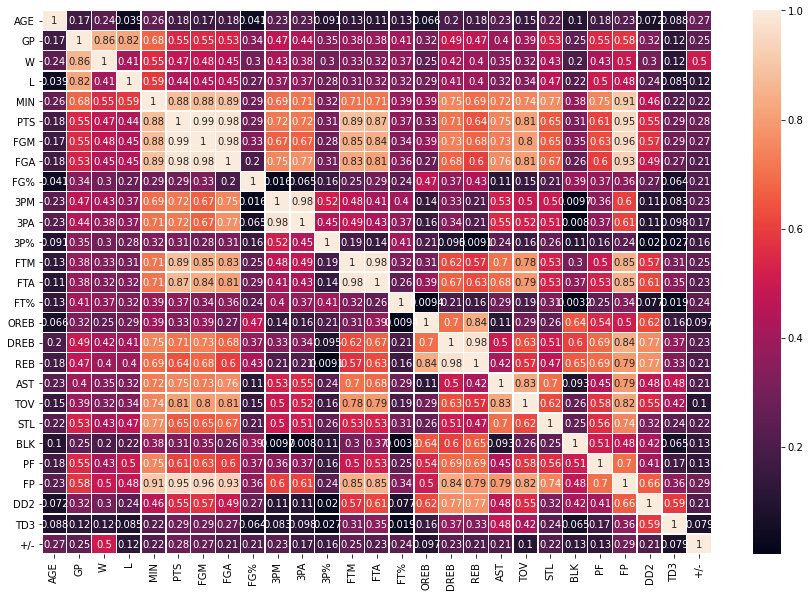

In [21]:
plt.subplots(figsize=(15,10))
sns.heatmap(abs(corr), annot=True,  linewidths=.5)